## Multilinear Regression
**Model**:

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n$
1. $\hat{y}$ is the predicted value.
2. $n$ is the number of features.
3. $x_i$ is the i-th feature value.
4. $\theta_j$ is the j-th model parameter (associated with $x_j$).

**Vectorized form**:

**$\hat{y} = \textbf{x}\cdot\theta^T$**.
1. $\theta = (\theta_0, \theta_1, ..., \theta_n)$ is the paramter vector.
2. $\textbf{x} = (x_0, x_1, ..., x_n)$ is the feature vector, where $x_0$ always equal to 1.

**MSE (mean square error) Cost function**:

$J = \frac{1}{m}\sum_{i=1}^{m}\big(\textbf{x}^{(i)}\cdot\theta^T - y^{(i)}\big)^2 = \frac{1}{m}\|\textbf{X}\cdot\theta^T  - \textbf{y}\|^2 $

1. $(\textbf{x}^{(i)}, y^{(i)})$ represents the i-th training example
2. $\textbf{X}$ is an $m\times n$ matrix whose i-th row is $\textbf{x}^{(i)}$.
3. $\textbf{y} = (y^{(0)}, ..., y^{(m)})^T$.
4. $\|\cdot\|$ is the Euclid (L2) norm of a vector:

$\|(a_1, a_2,..., a_n)\| = \sqrt{a_1^2 + a_2^2 + \cdots + a_n^2}$.

**Normal Equation**
The value of $\theta$ that minimizes the cost function is:

$\hat{\theta} = \big(\textbf{X}^T\cdot\textbf{X}\big)^{-1}\cdot\textbf{X}^T\cdot\textbf{y}$.

In [14]:
# Toy example
import numpy as np
import pandas as pd
columns = ['Homework', 'Midterm', 'Final']
data = pd.DataFrame(columns=columns)
data.loc[0, :] = [95, 90, 93]
data.loc[1, :] = [70, 60, 66]
data.loc[2, :] = [80, 60, 85]
data.loc[3, :] = [100, 80, 60]
data.loc[4, :] = [70, 85, 90]
data.head()

,Homework,Midterm,Final
0,95.0,90.0,93.0
1,70.0,60.0,66.0
2,80.0,60.0,85.0
3,100.0,80.0,60.0
4,70.0,85.0,90.0


**Task**: Build a model to predict the final scores using homework and midterm scores.

In [11]:
# Method 1: `sklearn.linear_model.LinearRegression`

In [12]:
# Method 2: normal equation

In [13]:
# Method 3: gradient descent

## Polynomial Regression

In [3]:
# Generate training data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# random seed
np.random.seed(42)

# Generate training data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

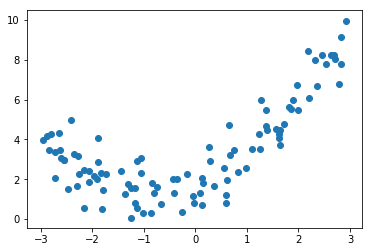

In [4]:
# Plot training data
plt.scatter(X,y)
plt.show()

## Polynomial Regression

**Model**:

$\hat{y} = \theta_0 + \theta_1x^1 + \theta_2x^2 +\cdots + \theta_nx^n$
1. $\hat{y}$ is the predicted value.
2. $n$ is the **degree of the polynomial**.
3. $x^i$ is the **i-th power of the feature**.
4. $\theta_j$ is the j-th model parameter (associated with $x^j$).

**Key observation**: polynomial regression is equivalent to multilinear regression with various powers of the input feature.

**Vectorized form**:

**$\hat{y} = \textbf{x}\cdot\theta^T$**.
1. $\theta = (\theta_0, \theta_1, ..., \theta_n)$ is the paramter vector.
2. $\textbf{x} = (x^0, x^1, ..., x^n)$ is the **feature vector**, where $x^0$ always equal to 1.

**MSE (mean square error) Cost function**:

$J = \frac{1}{m}\sum_{i=1}^{m}\big(\textbf{x}^{(i)}\cdot\theta^T - y^{(i)}\big)^2 = \|\textbf{X}\cdot\theta^T  - \textbf{y}\|^2 $

1. $(\textbf{x}^{(i)}, y^{(i)})$ represents the i-th training example
2. $\textbf{X}$ is an $m\times n$ matrix whose i-th row is $\textbf{x}^{(i)}$.
3. $\textbf{y} = (y^{(0)}, ..., y^{(m)})^T$.
4. $\|\cdot\|$ is the Euclid (L2) norm of a vector:

$\|(a_1, a_2,..., a_n)\| = \sqrt{a_1^2 + a_2^2 + \cdots + a_n^2}$.

**Normal Equation**
The value of $\theta$ that minimizes the cost function is:

$\hat{\theta} = \big(\textbf{X}^T\cdot\textbf{X}\big)\cdot\textbf{X}^T\cdot\textbf{y}$.

### Perform polynomial regression with sklearn

- Add powers to the training data: 

`from sklearn.preprocessing import PolynomialReatures`

- Solve polynomial regression with LinearRegression module.

## Homework:
1. Use normal equation to train a polynomial regression model on the above data set.
2. Use gradient descent to train a polynomial regression model on the above data set.

## Logistic Regression

We have studied how to use linear regression and polynomial regression to *predict a target numeric value*. There is another learning task, **classification**, aiming at predicting group membership rather than numeric values. Email spam filter is a good example: it is trained with many example emails with their class (spam or non-spam), and it must learn how to classify new emails.

Linear regression is **not** a good choice for classification tasks. We will introduce the **logistic regression** model and use the iris dataset to illustrate how the model works.

### Logistic Regression
**Single-class model**: fit the probability of data belonging to the class

$\log\frac{\hat{p}}{1 - \hat{p}} = h(x_1, ..., x_n),$

$h(x_1, ..., x_n) = \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n.$
- n: number of input features.
- x_1, ..., x_n: input features
- $\hat{p}$: the estimated probability of data belonging to the class
- $\theta_1,...,\theta_n$: parameters of the model

**Alternative format**:

$\hat{p} = \sigma(\textbf{x}\cdot\theta^T).$

- $\textbf{x} = (x_1, ..., x_n)$.
- $\theta = (\theta_1, ..., \theta_n)$.
- $\sigma(t) = \frac{1}{1+e^{-t}}$: logistic function

**Decision rule** (adjustible):

- prediction = 1 if $\hat{p}$ $\ge$ 0.5
- prediction = 0 if $\hat{p}$ < 0.5
